In [34]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_excel("CDR_6_MRI_selected.xlsx")
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [56]:
import pandas as pd
from sklearn.cluster import KMeans

data1 = pd.read_excel('CDR_6_MRIfull.xlsx')
data1.head()

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543


original shape:    (1600, 139)
transformed shape: (1600, 2)


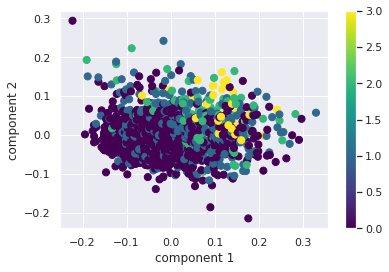

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA    

# PCA
X=data1.iloc[:,15:]
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

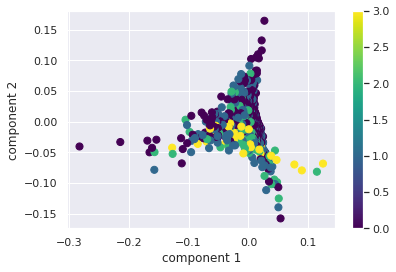

In [38]:
# LLE

from sklearn.manifold import LocallyLinearEmbedding

    
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

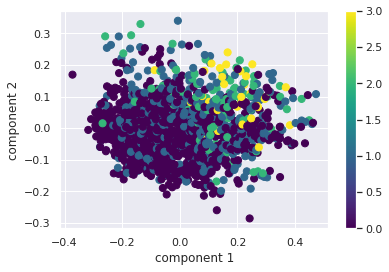

In [39]:
# ISOMAP

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=data1['CDRGLOB'], s=50, cmap='viridis')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

TASK 12 B - Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier

For this task, please use them with their default parameter values and provide the classification report and confusion matrix for each of these.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import LocallyLinearEmbedding, TSNE


In [41]:
# PCA
pca = PCA(n_components=7)
fit_data = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for PCA:",accuracy_score(y_test, y_pred))


# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for PCA:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for PCA:",accuracy_score(y_test, y_pred))

GNB Accuracy for PCA: 0.665625
SVM Accuracy for PCA: 0.684375
RFC Accuracy for PCA: 0.66875


In [42]:
# LLE
lle = LocallyLinearEmbedding(n_components=7, n_neighbors=10)
fit_data = lle.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for LLE:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for LLE:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for LLE:",accuracy_score(y_test, y_pred))

GNB Accuracy for LLE: 0.58125
SVM Accuracy for LLE: 0.665625
RFC Accuracy for LLE: 0.596875


In [43]:
# ISOMAP
iso = Isomap(n_components=7)
fit_data = iso.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit_data, data1['CDRGLOB'], test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

GNB Accuracy for ISOMAP: 0.603125
SVM Accuracy for ISOMAP: 0.671875
RFC Accuracy for ISOMAP: 0.64375


TASK 12 C - Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations.

In [44]:
import pandas as pd
from sklearn.cluster import KMeans

data2 = pd.read_excel("CDR_6_MRI_selected.xlsx")
data2

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


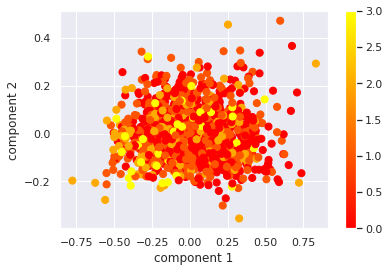

In [46]:
#PCA for New DS

Y=data2.iloc[:,15:]
pca = PCA(n_components=2)
pca.fit(Y)
Y_pca = pca.transform(Y)


plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

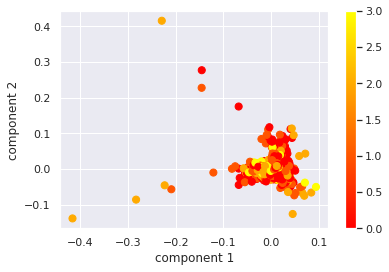

In [47]:
#LLE for New DS

from sklearn.manifold import LocallyLinearEmbedding, TSNE

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
Y_lle = lle.fit_transform(Y)

plt.scatter(Y_lle[:, 0], Y_lle[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

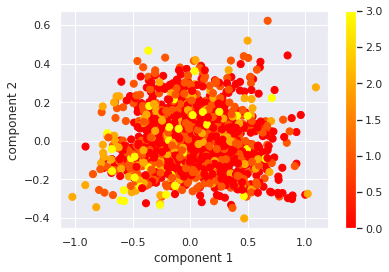

In [48]:
#Isomap for New DS

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
Y_iso = iso.fit_transform(Y)

plt.scatter(Y_iso[:, 0], Y_iso[:, 1], c=data2.CDRGLOB, s=50, cmap='autumn')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


     

#PCA for new DS

pca = PCA(n_components=7)
fitted_data = pca.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.2, random_state=42)
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.675
SVM Accuracy for new dataset: 0.65625
RFC Accuracy for new dataset: 0.646875


In [50]:
#Isomap for New DS

iso = Isomap(n_components=7)
fitted_data = pca.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for ISOMAP:",accuracy_score(y_test, y_pred))

GNB Accuracy for ISOMAP: 0.675
SVM Accuracy for ISOMAP: 0.65625
RFC Accuracy for ISOMAP: 0.6625


In [51]:
# LLE for New DS

lle = LocallyLinearEmbedding(n_components=7, n_neighbors=10)
fitted_data = lle.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.62
SVM Accuracy for new dataset: 0.6275
RFC Accuracy for new dataset: 0.615


In [52]:
# ISOMAP for New DS

iso = Isomap(n_components=7)
fitted_data = iso.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy for new dataset:",accuracy_score(y_test, y_pred))

# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for new dataset:",accuracy_score(y_test, y_pred))

GNB Accuracy for new dataset: 0.6375
SVM Accuracy for new dataset: 0.635
RFC Accuracy for new dataset: 0.6175


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# PCA
pca = PCA(n_components=5)
fitted_data = pca.fit_transform(Y)

# LLE
lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10)
fitted_data = lle.fit_transform(Y)

# ISOMAP
iso = Isomap(n_components=5)
fitted_data = iso.fit_transform(Y)


# TSNE
tsne = TSNE(n_components=3)
fitted_data = tsne.fit_transform(Y)

# MinMaxScaler
scaler = MinMaxScaler()
fitted_data = scaler.fit_transform(fitted_data)


X_train, X_test, y_train, y_test = train_test_split(fitted_data, data2.CDRGLOB, test_size=0.25, random_state=42)


# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC Accuracy for PCA-LLE-ISO-TSNE:",accuracy_score(y_test, y_pred))

# GridSearchCV
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print("RFC Accuracy for PCA-LLE-ISO-TSNE with GridSearchCV:",accuracy_score(y_test, grid_predictions))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


RFC Accuracy for PCA-LLE-ISO-TSNE: 0.6225
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ......max_depth=5, n_estimators=10;, score=0.625 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=10;, score=0.625 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=10;, score=0.625 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=10;, score=0.617 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=10;, score=0.633 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=20;, score=0.629 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=20;, score=0.629 total time=   0.1s
[CV 3/5] END ......max_depth=5, n_estimators=20;, score=0.633 total time=   0.1s
[CV 4/5] END ......max_depth=5, n_estimators=20;, score=0.617 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=20;, score=0.617 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=30;, score=0.642 total time=   0.1s
[CV 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


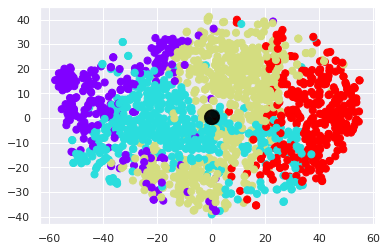

In [54]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data3 = data2.iloc[:, 16:]
scaler = MinMaxScaler()
fitted_data = scaler.fit_transform(data3)

kmeans = KMeans(n_clusters=4)
kmeans.fit(fitted_data)
y_kmeans = kmeans.predict(fitted_data)

tsne = TSNE(n_components=2)
fitted_data = tsne.fit_transform(fitted_data)

plt.scatter(fitted_data[:, 0], fitted_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

TASK 12 E - Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means.

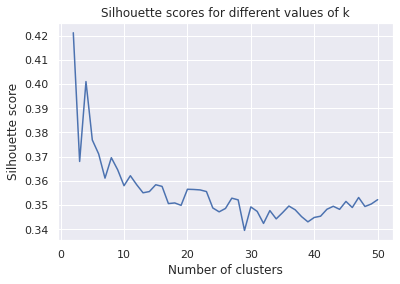

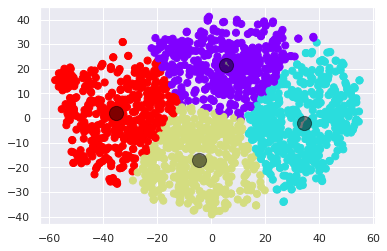

In [55]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 51):
    silhouette_scores.append(silhouette_score(fitted_data, KMeans(n_clusters = n_cluster).fit_predict(fitted_data)))
    
plt.plot(range(2, 51), silhouette_scores)
plt.title('Silhouette scores for different values of k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


kmeans = KMeans(n_clusters=4)
kmeans.fit(fitted_data)
y_kmeans = kmeans.predict(fitted_data)
    
plt.scatter(fitted_data[:, 0], fitted_data[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
